In [1]:
!pip install tensorflow==2.16.1
!pip install segmentation-models
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models
!PYTHONHASHSEED=0
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from time import time
import numpy as np
import random as python_random
np.random.seed(0)
python_random.seed(0)
tf.random.set_seed(0)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 67.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 22.1 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Fo

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
train_dataset_path = '/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/train_imgs_2D (2).npy'
train_mask_path = '/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/train_labels_2D (2).npy'
val_dataset_path = '/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/validation_imgs_2D (2).npy'
val_mask_path = '/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/validation_labels_2D (2).npy'

X_train = np.load(train_dataset_path)
Y_train = np.load(train_mask_path)
X_val = np.load(val_dataset_path)
Y_val = np.load(val_mask_path)

In [4]:
from tensorflow.keras.models import load_model

In [6]:
model_path = '/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/models/model_aug.keras'
weights_path = '/content/gdrive/MyDrive/Colab Notebooks/Progetto DeepL/models/model_aug.weights.h5'



model = load_model(model_path, compile=False)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=segmentation_models.losses.DiceLoss(), metrics=[segmentation_models.metrics.FScore(), segmentation_models.metrics.IOUScore()])
model.load_weights(weights_path)

/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 150 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [7]:

callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]

In [8]:
history = model.fit(x=X_train, y= Y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_val, Y_val), callbacks=[callbacks])

Epoch 1/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 64s 350ms/step - f1-score: 0.5722 - iou_score: 0.4474 - loss: 0.4278 - val_f1-score: 0.5545 - val_iou_score: 0.4553 - val_loss: 0.4445
Epoch 2/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 33s 289ms/step - f1-score: 0.6090 - iou_score: 0.4792 - loss: 0.3910 - val_f1-score: 0.4604 - val_iou_score: 0.3804 - val_loss: 0.5336
Epoch 3/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 42s 295ms/step - f1-score: 0.6315 - iou_score: 0.4996 - loss: 0.3685 - val_f1-score: 0.6032 - val_iou_score: 0.4987 - val_loss: 0.3915
Epoch 4/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 33s 290ms/step - f1-score: 0.6437 - iou_score: 0.5113 - loss: 0.3563 - val_f1-score: 0.6075 - val_iou_score: 0.5009 - val_loss: 0.3877
Epoch 5/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 294ms/step - f1-score: 0.6618 - iou_score: 0.5290 - loss: 0.3382 - val_f1-score: 0.6062 - val_iou_score: 0.4962 - val_loss: 0.3915
Epoch 6/30
113/113 ━━━━━━━━━━━━━━━━━━━━ 41s 290ms/step - f1-score: 0.6640 - iou_score: 0.5310 - loss: 0.3360 - val_f1-score: 

In [9]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 4)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ random_rotation           │ (None, 128, 128, 4)    │              0 │ input_layer[0][0]      │
│ (RandomRotation)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 128, 128, 32)   │          1,184 │ random_rotation[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 128, 128, 32)   │            128 │ conv2d[0][0]           │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 128, 128, 32)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 128, 128, 32)   │          9,248 │ activation[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 32)   │            128 │ conv2d_1[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 128, 128, 32)   │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 64, 64, 32)     │              0 │ activation_1[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 64, 64, 64)     │            256 │ conv2d_2[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 64, 64, 64)     │              0 │ batch_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 64, 64, 64)     │         36,928 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 64, 64, 64)     │            256 │ conv2d_3[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 64, 64, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 32, 32, 64)     │              0 │ activation_3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├──────────────────────

 Total params: 23,564,686 (89.89 MB)

 Trainable params: 7,852,932 (29.96 MB)

 Non-trainable params: 5,888 (23.00 KB)

 Optimizer params: 15,705,866 (59.91 MB)

<Figure size 500x800 with 0 Axes>

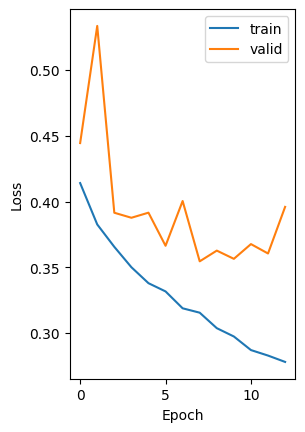

<Figure size 500x800 with 0 Axes>

In [10]:
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train', 'valid'])
plt.figure(figsize = (5,8))


<Figure size 500x800 with 0 Axes>

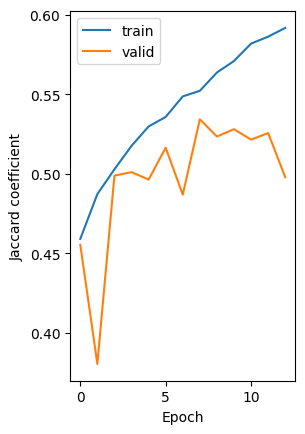

<Figure size 500x800 with 0 Axes>

In [11]:
plt.subplot(1, 2, 1)
plt.plot(history.history['iou_score'])
plt.plot(history.history['val_iou_score'])
plt.xlabel('Epoch')
plt.ylabel('Jaccard coefficient')
plt.legend(['train', 'valid'])
plt.figure(figsize = (5,8))

<Figure size 500x800 with 0 Axes>

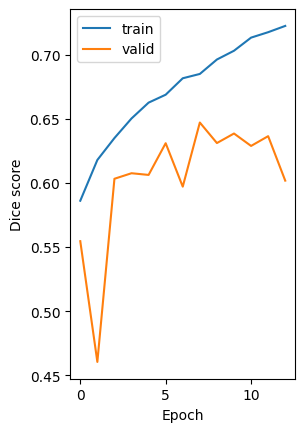

<Figure size 500x800 with 0 Axes>

In [12]:
plt.subplot(1, 2, 1)
plt.plot(history.history['f1-score'])
plt.plot(history.history['val_f1-score'])
plt.xlabel('Epoch')
plt.ylabel('Dice score')
plt.legend(['train', 'valid'])
plt.figure(figsize = (5,8))

In [13]:
train_loss = history.history['loss'][-1]
train_acc = history.history['iou_score'][-1]
train_dice = history.history['f1-score'][-1]

val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_iou_score'][-1]
val_dice = history.history['val_f1-score'][-1]

import pandas as pd

row1 = {'Loss': train_loss, 'Jaccard coefficient': train_acc, 'F1 score': train_dice}
row2 = {'Loss': val_loss, 'Jaccard coefficient': val_acc, 'F1 score': val_dice}
rows = [row1, row2]

metrics_table = pd.DataFrame(rows, index=['Train', 'Validation'])
metrics_table

,Loss,Jaccard coefficient,F1 score
Train,0.277965,0.591579,0.722339
Validation,0.395926,0.497769,0.601732


In [14]:
epochs_table = pd.DataFrame()
epochs_table['Loss'] = history.history['loss']
epochs_table['Validation Loss'] = history.history['val_loss']
epochs_table['Jaccard'] = history.history['iou_score']
epochs_table['Validation Jaccard'] = history.history['iou_score']
epochs_table['Dice score'] = history.history['f1-score']
epochs_table['Validation Dice score'] = history.history['val_f1-score']

epochs_table

,Loss,Validation Loss,Jaccard,Validation Jaccard,Dice score,Validation Dice score
0,0.414052,0.444492,0.458966,0.458966,0.586061,0.554532
1,0.382576,0.533629,0.487140,0.487140,0.617847,0.460411
2,0.365525,0.391473,0.502732,0.502732,0.634922,0.603190
3,0.350024,0.387659,0.517425,0.517425,0.650196,0.607504
4,0.337875,0.391525,0.529671,0.529671,0.662541,0.606187
5,0.331609,0.366337,0.535627,0.535627,0.668718,0.630903
6,0.318766,0.400400,0.548539,0.548539,0.681532,0.597054
7,0.315425,0.354500,0.552041,0.552041,0.684904,0.647031
8,0.303649,0.362664,0.563554,0.563554,0.696154,0.631038
9,0.297310,0.356407,0.570807,0.570807,0.702988,0.638466


In [16]:
model.save('model.keras')
model.save_weights('model.weights.h5')

In [17]:
metrics_table.to_csv('train_validation_metrics')
epochs_table.to_csv('train_epochs.csv')